Time-Series Analysis

● Use any daily time series from Investing.com or similar source with a strong sample of covariates. Target commodities price like: Oil, Natural Gas, Resin, or Metal Prices.

○ Option 1. Feature Importance. Dynamic Time Warping and/or XGBoost/Shapley
Value hybrid model approach to quantify which factors influence the target
positively or negative.

○ Option 2. LSTM derivatives on day ahead prediction with confidence bounds
● How would you improve and present your results with more time
and resources
● Related thinking and planning in a short report

In [1]:
from google.colab import files
files.upload()

Saving Natural Gas Futures Historical Data.csv to Natural Gas Futures Historical Data.csv


{'Natural Gas Futures Historical Data.csv': b'\xef\xbb\xbf"Date","Price","Open","High","Low","Vol.","Change %"\r\n"Mar 25, 2022","423.40","413.30","425.20","407.30","17.74K","2.34%"\r\n"Mar 24, 2022","413.70","392.80","416.70","387.60","47.22K","4.15%"\r\n"Mar 23, 2022","397.20","391.90","407.20","389.20","57.46K","1.17%"\r\n"Mar 22, 2022","392.60","373.40","393.80","371.10","70.12K","5.77%"\r\n"Mar 21, 2022","371.20","374.30","378.00","362.10","66.62K","0.30%"\r\n"Mar 18, 2022","370.10","371.80","376.30","367.80","39.36K","-1.33%"\r\n"Mar 17, 2022","375.10","360.90","378.90","355.60","57.68K","3.68%"\r\n"Mar 16, 2022","361.80","353.30","363.30","352.30","59.61K","3.19%"\r\n"Mar 15, 2022","350.60","353.30","354.20","341.30","52.64K","-1.35%"\r\n"Mar 14, 2022","355.40","357.30","360.00","345.20","63.59K","-2.47%"\r\n"Mar 11, 2022","364.40","355.60","368.40","355.60","59.00K","3.38%"\r\n"Mar 10, 2022","352.50","348.70","356.70","344.80","60.15K","1.73%"\r\n"Mar 09, 2022","346.50","354.10

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Natural Gas Futures Historical Data.csv')
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 25, 2022",423.4,413.3,425.2,407.3,17.74K,2.34%
1,"Mar 24, 2022",413.7,392.8,416.7,387.6,47.22K,4.15%
2,"Mar 23, 2022",397.2,391.9,407.2,389.2,57.46K,1.17%
3,"Mar 22, 2022",392.6,373.4,393.8,371.1,70.12K,5.77%
4,"Mar 21, 2022",371.2,374.3,378.0,362.1,66.62K,0.30%
5,"Mar 18, 2022",370.1,371.8,376.3,367.8,39.36K,-1.33%
6,"Mar 17, 2022",375.1,360.9,378.9,355.6,57.68K,3.68%
7,"Mar 16, 2022",361.8,353.3,363.3,352.3,59.61K,3.19%
8,"Mar 15, 2022",350.6,353.3,354.2,341.3,52.64K,-1.35%
9,"Mar 14, 2022",355.4,357.3,360.0,345.2,63.59K,-2.47%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      318 non-null    object 
 1   Price     318 non-null    float64
 2   Open      318 non-null    float64
 3   High      318 non-null    float64
 4   Low       318 non-null    float64
 5   Vol.      318 non-null    object 
 6   Change %  318 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.5+ KB


In [5]:
df['Date'] = pd.to_datetime(df.Date)

In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-03-25,423.4,413.3,425.2,407.3,17.74K,2.34%
1,2022-03-24,413.7,392.8,416.7,387.6,47.22K,4.15%
2,2022-03-23,397.2,391.9,407.2,389.2,57.46K,1.17%
3,2022-03-22,392.6,373.4,393.8,371.1,70.12K,5.77%
4,2022-03-21,371.2,374.3,378.0,362.1,66.62K,0.30%
...,...,...,...,...,...,...,...
313,2021-01-07,201.1,199.1,202.6,195.7,234.88K,-0.05%
314,2021-01-06,201.2,197.6,203.2,191.2,252.17K,1.51%
315,2021-01-05,198.2,190.6,200.4,190.6,216.95K,4.59%
316,2021-01-04,189.5,189.1,195.5,188.3,222.49K,2.21%


In [7]:
df = df.set_index('Date').sort_index(ascending=True)
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-01-01,185.4,182.7,188.0,182.7,24.38K,1.81%
2021-01-04,189.5,189.1,195.5,188.3,222.49K,2.21%
2021-01-05,198.2,190.6,200.4,190.6,216.95K,4.59%
2021-01-06,201.2,197.6,203.2,191.2,252.17K,1.51%
2021-01-07,201.1,199.1,202.6,195.7,234.88K,-0.05%


In [10]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [11]:
df.describe()

,Price,Open,High,Low
count,318.000000,318.000000,318.000000,318.000000
mean,288.167925,287.667610,295.304088,280.966038
std,76.121765,75.922751,79.780540,72.428544
min,179.700000,181.200000,182.100000,176.200000
25%,214.850000,215.850000,219.300000,212.100000
50%,288.700000,288.600000,296.000000,282.800000
75%,352.950000,353.975000,363.375000,344.325000
max,472.900000,465.000000,485.000000,443.000000


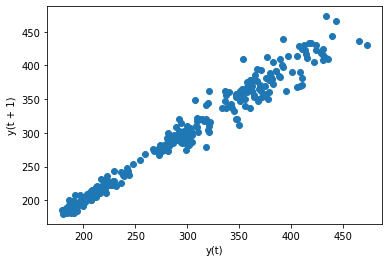

In [8]:
lag_plot(df['Price'], lag=1)

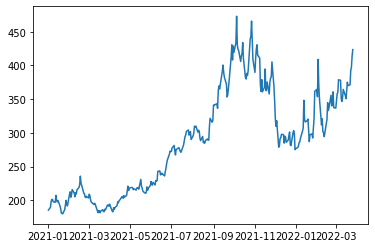

In [9]:
plt.plot(df['Price'])

Checking Stationarity

In [17]:
ts = df.Price
ts

Date
2021-01-01    185.4
2021-01-04    189.5
2021-01-05    198.2
2021-01-06    201.2
2021-01-07    201.1
              ...  
2022-03-21    371.2
2022-03-22    392.6
2022-03-23    397.2
2022-03-24    413.7
2022-03-25    423.4
Name: Price, Length: 318, dtype: float64

In [13]:
adfuller_result = adfuller(df['Price'], autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
  print('Critial value:')
  print(f' {key},{value}')

ADF Statistic: -0.9576349408059396
p-value: 0.7684008246966343
Critial value:
 1%,-3.4523371197407404
Critial value:
 5%,-2.871222860740741
Critial value:
 10%,-2.571929211111111


In [88]:
newmodel = ARMA(ts, order=(1,1))
result = newmodel.fit() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [90]:
predictions = result.predict('01/01/2021', '25/03/2022')

In [91]:
actuals = df['01/01/2021': '25/03/2022']['Price']

In [92]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, predictions)
print('MAE: %f' % mae)

MAE: 8.960624


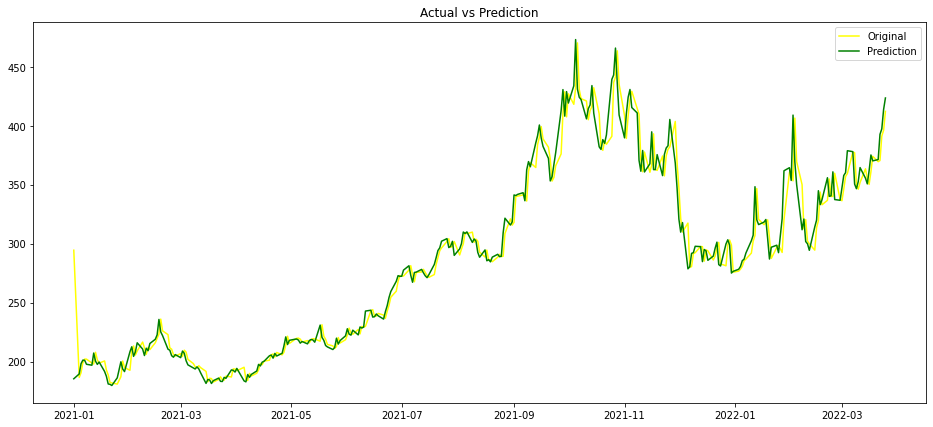

In [95]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

orig = plt.plot(predictions, color='yellow', label='Original')
pred = plt.plot(actuals, color='green', label='Prediction')

plt.legend(loc='best')
plt.title("Actual vs Prediction")
plt.show(block = False)

Thank you for the opportunity..!!!